## Sediment Load Analysis
By each grain size class, determined through rating curves specifically for each

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import timedelta

# import SSC continuous record
SSC_spring = pd.read_csv('../suspended_sediment_analysis/SSC_by_grain_size/spring_SSC_by_grain_size.csv', parse_dates=True , index_col='Date_Time') # in mg/L
SSC_summer = pd.read_csv('../suspended_sediment_analysis/SSC_by_grain_size/summer_SSC_by_grain_size.csv', parse_dates=True , index_col='Date_Time') # in mg/L
# import discharge continuous record
discharge = pd.read_csv('../../data/discharge/discharge_2023.csv', parse_dates=True, index_col='Date_Time')

Merge discharge to SSC 

In [4]:
# resample and interpolate to 1 min intervals
SSC_spring = SSC_spring.resample('1min').mean().interpolate(method='linear')
SSC_summer = SSC_summer.resample('1min').mean().interpolate(method='linear')
discharge = discharge.resample('1min').mean().interpolate(method='linear')
# merge discharge to SSC by date (index)
SSC_spring = SSC_spring.merge(discharge, left_index=True, right_index=True, how='left') 
SSC_summer = SSC_summer.merge(discharge, left_index=True, right_index=True, how='left')

Calculate Qs (Sediment Load in grams/seconds)

In [5]:
# calculate Qs (sediment Load in g/s)
# spring
SSC_spring['C_Qs'] = SSC_spring['C_conc'] * SSC_spring['Q'] # mg/L * m^3/s = g/s, assuming 1m3 = 1000L and 1g = 1000mg
SSC_spring['S_Qs'] = SSC_spring['S_conc'] * SSC_spring['Q']
SSC_spring['FS_Qs'] = SSC_spring['FS_conc'] * SSC_spring['Q']
SSC_spring['Total_Qs'] = SSC_spring['C_Qs'] + SSC_spring['S_Qs'] + SSC_spring['FS_Qs']
# summer
SSC_summer['C_Qs'] = SSC_summer['C_conc'] * SSC_summer['Q']  
SSC_summer['S_Qs'] = SSC_summer['S_conc'] * SSC_summer['Q']
SSC_summer['FS_Qs'] = SSC_summer['FS_conc'] * SSC_summer['Q']
SSC_summer['Total_Qs'] = SSC_summer['C_Qs'] + SSC_summer['S_Qs'] + SSC_summer['FS_Qs']

### Plots

Time Series

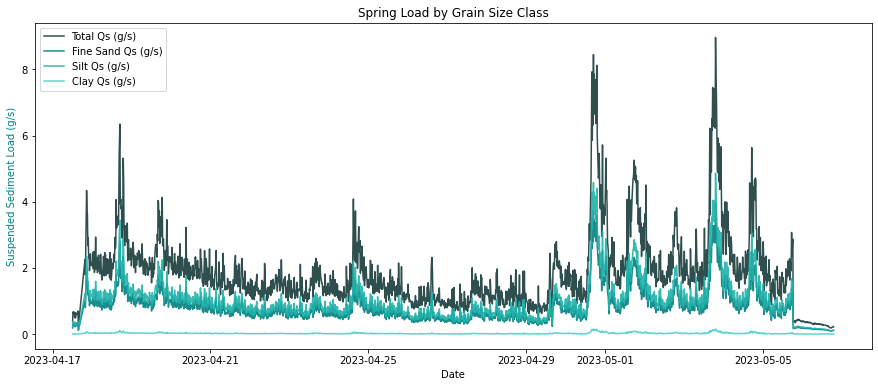

In [7]:
# plot time series of spring continuous record
plt.figure(figsize=(15, 6))
plt.plot(SSC_spring.index, SSC_spring['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(SSC_spring.index, SSC_spring['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(SSC_spring.index, SSC_spring['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(SSC_spring.index, SSC_spring['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Spring Load by Grain Size Class')
plt.show()

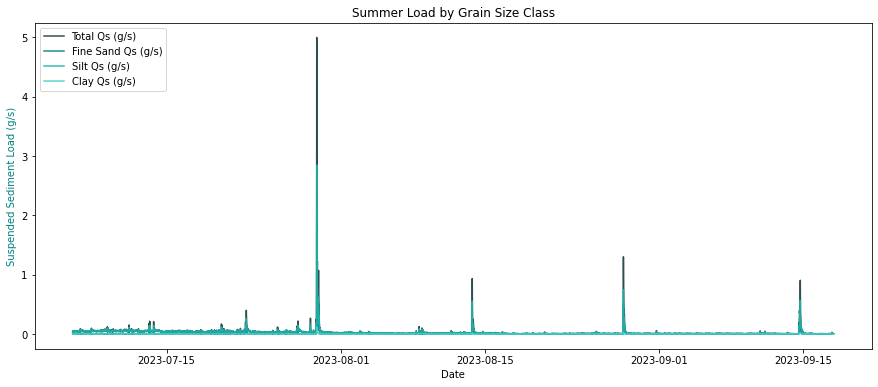

In [8]:
# plot time series of spring continuous record
plt.figure(figsize=(15, 6))
plt.plot(SSC_summer.index, SSC_summer['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(SSC_summer.index, SSC_summer['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(SSC_summer.index, SSC_summer['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(SSC_summer.index, SSC_summer['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Summer Load by Grain Size Class')
plt.show()

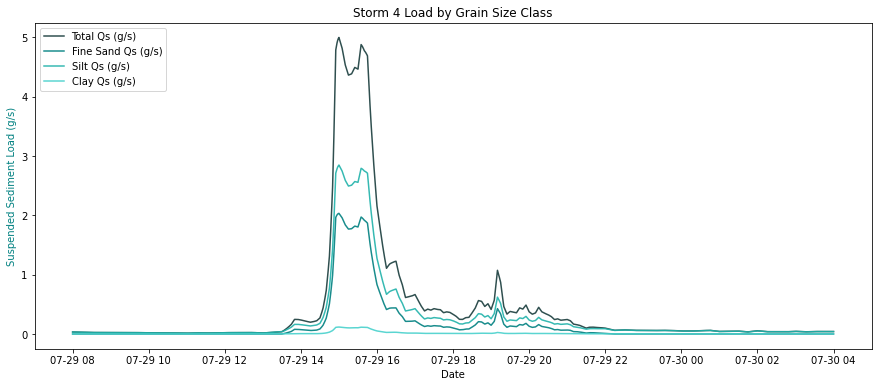

In [ ]:
# Storm 4: 
# 07/29/23 to 08/01/23
storm_start = '2023-07-29 08:00:00'
storm_end = '2023-07-30 04:00:00'
# filter storm data
storm4 = SSC_summer.loc[storm_start:storm_end] 
# plot storm 4 time series
plt.figure(figsize=(15, 6)) 
plt.plot(storm4.index, storm4['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(storm4.index, storm4['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(storm4.index, storm4['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(storm4.index, storm4['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Storm 4 Load by Grain Size Class')
plt.show()


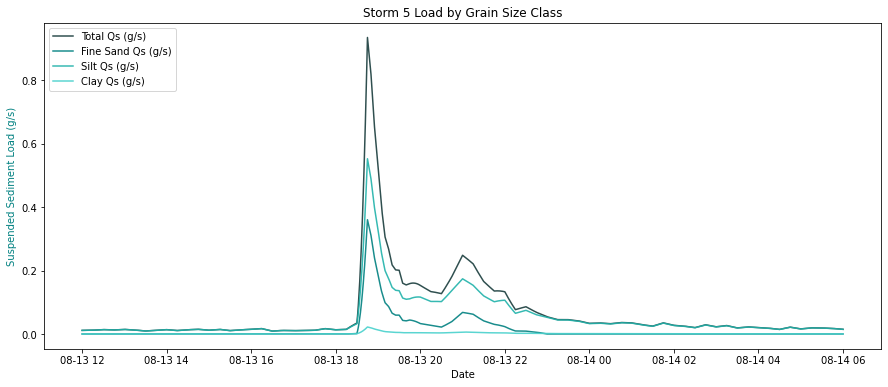

In [ ]:
# Storm 5: 
# 08/13/23 to 08/14/23
storm_start = '2023-08-13 12:00:00'
storm_end = '2023-08-14 06:00:00'
# filter storm data
storm5 = SSC_summer.loc[storm_start:storm_end] 
# plot storm 5 time series
plt.figure(figsize=(15, 6)) 
plt.plot(storm5.index, storm5['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(storm5.index, storm5['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(storm5.index, storm5['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(storm5.index, storm5['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Storm 5 Load by Grain Size Class')
plt.show()

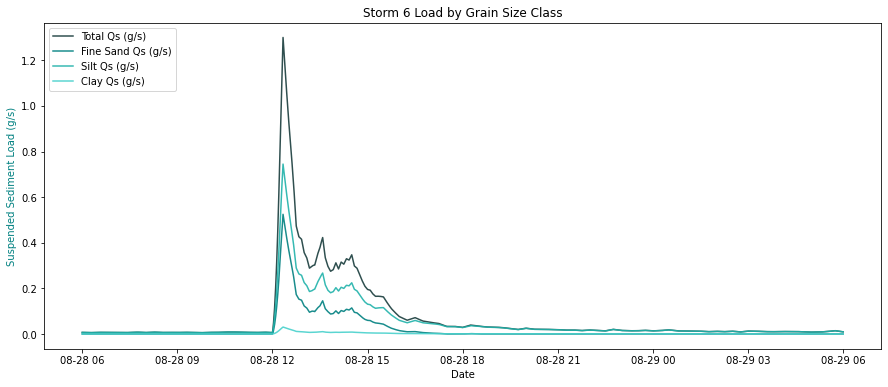

In [11]:
# Storm 6: 
# 08/28/23 to 08/29/23
storm_start = '2023-08-28 06:00:00'
storm_end = '2023-08-29 06:00:00'
# filter storm data
storm6 = SSC_summer.loc[storm_start:storm_end] 
# plot storm 6 time series
plt.figure(figsize=(15, 6)) 
plt.plot(storm6.index, storm6['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(storm6.index, storm6['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(storm6.index, storm6['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(storm6.index, storm6['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Storm 6 Load by Grain Size Class')
plt.show()

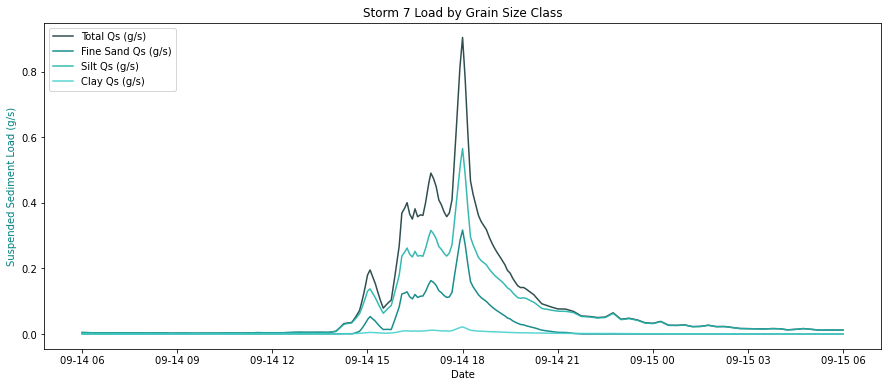

In [12]:
# Storm 7: 
# 09/14/23 to 09/15/23
storm_start = '2023-09-14 06:00:00'
storm_end = '2023-09-15 06:00:00'
# filter storm data
storm7 = SSC_summer.loc[storm_start:storm_end] 
# plot storm 7 time series
plt.figure(figsize=(15, 6)) 
plt.plot(storm7.index, storm7['Total_Qs'], label='Total Qs (g/s)', color='darkslategray')
plt.plot(storm7.index, storm7['FS_Qs'], label='Fine Sand Qs (g/s)', color='teal', alpha=0.9)
plt.plot(storm7.index, storm7['S_Qs'], label='Silt Qs (g/s)', color='lightseagreen', alpha=0.9)
plt.plot(storm7.index, storm7['C_Qs'], label='Clay Qs (g/s)', color='mediumturquoise', alpha=0.9)

plt.ylabel('Suspended Sediment Load (g/s)', color='teal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.title('Storm 7 Load by Grain Size Class')
plt.show()

Export to csv

In [14]:
SSC_spring.to_csv('suspended_sediment_load/Qs_by_grain_size_class/Qs_spring_GSclass.csv')
SSC_summer.to_csv('suspended_sediment_load/Qs_by_grain_size_class/Qs_summer_GSclass.csv')

## Calculating total transported load

Spring Integration

In [16]:
time_deltas_spring = SSC_spring.index.to_series().diff().dt.total_seconds().fillna(0).values
# dictionary to store total mass 
total_mass_spring = {}
grain_size_cols = ['C_Qs', 'S_Qs', 'FS_Qs', 'Total_Qs'] # grain size columns to integrate

# integrate each grain size class over time
for col in grain_size_cols:
    # get Qs values (g/s) and replace NaNs with 0
    Qs_values = SSC_spring[col].fillna(0).values
    # multiply Qs (g/s) × delta_t (s) to get total grams
    total_mass = (Qs_values * time_deltas_spring).sum()
    total_mass_spring[col] = total_mass

Summer Integration

In [17]:
time_deltas_summer = SSC_summer.index.to_series().diff().dt.total_seconds().fillna(0).values
# dictionary to store total mass 
total_mass_summer = {}
grain_size_cols = ['C_Qs', 'S_Qs', 'FS_Qs', 'Total_Qs'] # grain size columns to integrate

for col in grain_size_cols:
    Qs_values = SSC_summer[col].fillna(0).values
    total_mass = (Qs_values * time_deltas_summer).sum()
    total_mass_summer[col] = total_mass

Display

In [18]:
print("Spring Total Transported Sediment (grams):")
for grain_class, mass in total_mass_spring.items():
    print(f"{grain_class}: {mass:,.0f} g")

print("\nSummer Total Transported Sediment (grams):")
for grain_class, mass in total_mass_summer.items():
    print(f"{grain_class}: {mass:,.0f} g")

# convert to df for easier analysis
spring_totals_df = pd.DataFrame.from_dict(total_mass_spring, orient='index', columns=['Total_grams'])
summer_totals_df = pd.DataFrame.from_dict(total_mass_summer, orient='index', columns=['Total_grams'])

Spring Total Transported Sediment (grams):
C_Qs: 32,022 g
S_Qs: 1,669,248 g
FS_Qs: 1,367,288 g
Total_Qs: 3,068,559 g

Summer Total Transported Sediment (grams):
C_Qs: 3,946 g
S_Qs: 164,050 g
FS_Qs: 18,906 g
Total_Qs: 186,902 g


In [20]:
# export the total masses to CSV
spring_totals_df.to_csv('transported_mass/total_mass_spring_by_grain_size_class.csv')
summer_totals_df.to_csv('transported_mass/total_mass_summer_by_grain_size_class.csv')